In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, classification_report


Testing on D1

In [11]:
# Download latest version
path = kagglehub.dataset_download("doctri/microsoft-research-paraphrase-corpus")

test_dataset_path = path + "/msr_paraphrase_test.txt"

test_df = pd.read_csv(test_dataset_path, sep='\t', header=0, on_bad_lines='skip')

# Drop unnecessary columns
test_df = test_df[["Quality", "#1 String", "#2 String"]]

# Ensure no missing values
test_df.dropna(inplace=True)

test_df["Quality"] = test_df["Quality"].astype(int)

# Preprocess the sentences
def preprocess(text):
    return text.lower()

test_df['#1 String'] = test_df['#1 String'].apply(preprocess)
test_df['#2 String'] = test_df['#2 String'].apply(preprocess)

In [12]:
# Vectorize the sentences using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix1 = vectorizer.fit_transform(test_df['#1 String'])
tfidf_matrix2 = vectorizer.transform(test_df['#2 String'])

# Compute cosine similarities
cosine_similarities = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

# Set a threshold for classification (this can be tuned)
threshold = 0.5
predictions = (cosine_similarities >= threshold).astype(int)

# Convert predictions to a flat array
y_pred = predictions.diagonal()

# Extract true labels
y_true = test_df['Quality'].to_numpy()

<Figure size 640x480 with 0 Axes>

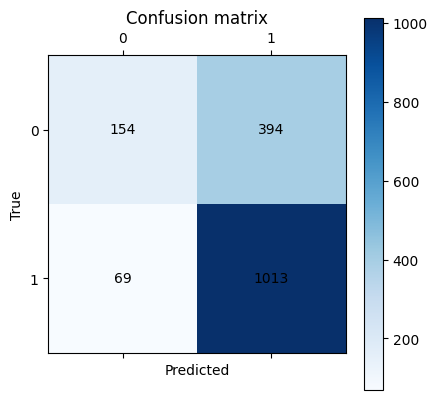

In [13]:

cm = confusion_matrix(y_true, y_pred)

plt.figure()
plt.matshow(cm, cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.show()

In [14]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.28      0.40       548
           1       0.72      0.94      0.81      1082

    accuracy                           0.72      1630
   macro avg       0.71      0.61      0.61      1630
weighted avg       0.71      0.72      0.67      1630



Testing on D2

In [15]:
test_df = pd.read_csv("complete_synthetic.csv", sep=',', header=0, on_bad_lines='skip', encoding='latin1')

# Drop unnecessary columns
test_df = test_df[["Quality", "#1 String", "#2 String"]]

# Ensure no missing values
test_df.dropna(inplace=True)

test_df["Quality"] = test_df["Quality"].astype(int)

# Preprocess the sentences
def preprocess(text):
    return text.lower()

test_df['#1 String'] = test_df['#1 String'].apply(preprocess)
test_df['#2 String'] = test_df['#2 String'].apply(preprocess)

In [16]:
# Vectorize the sentences using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix1 = vectorizer.fit_transform(test_df['#1 String'])
tfidf_matrix2 = vectorizer.transform(test_df['#2 String'])

# Compute cosine similarities
cosine_similarities = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

# Set a threshold for classification (this can be tuned)
threshold = 0.5
predictions = (cosine_similarities >= threshold).astype(int)

# Convert predictions to a flat array
y_pred = predictions.diagonal()

# Extract true labels
y_true = test_df['Quality'].to_numpy()

<Figure size 640x480 with 0 Axes>

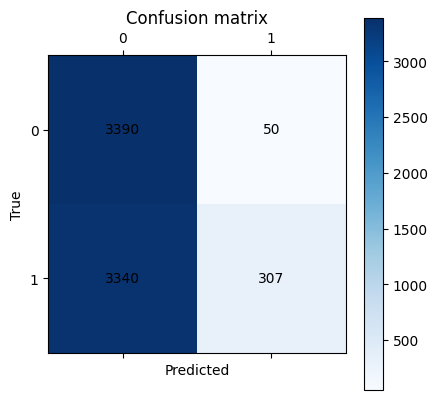

In [17]:
cm = confusion_matrix(y_true, y_pred)

plt.figure()
plt.matshow(cm, cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.show()

In [18]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.99      0.67      3440
           1       0.86      0.08      0.15      3647

    accuracy                           0.52      7087
   macro avg       0.68      0.53      0.41      7087
weighted avg       0.69      0.52      0.40      7087

